In [1]:
from osgeo import gdal, osr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import csv
from pyproj import Proj, transform
import math

In [5]:
# 파일을 불러와 넘파이 배열로 저장
gdal.UseExceptions()

# Load DEM data
dem_file = 'C:/Users/leeyj/Downloads/98442/c_gls_LST_202401142300_GLOBE_GEO_V2.1.2_KP_LST.tif'
dataset = gdal.Open(dem_file)
band = dataset.GetRasterBand(1)
elevation = band.ReadAsArray()

# Get geotransform info
geotransform = dataset.GetGeoTransform()

# Initialize an empty list to store the data
matrix = []

# Calculate longitude, latitude, and elevation for each pixel
for y in range(elevation.shape[0]):
    row = []
    for x in range(elevation.shape[1]):
        longitude = geotransform[0] + x*geotransform[1] + y*geotransform[2]
        latitude = geotransform[3] + x*geotransform[4] + y*geotransform[5]
        elev = elevation[y, x]
        row.append((elev, longitude, latitude))
    matrix.append(row)

# Convert the list to a NumPy array for more efficient operations and handling
matrix_np = np.array(matrix)

# Now `matrix_np` contains the elevation, longitude, and latitude for each pixel
# matrix_np.shape

In [3]:
matrix_np

array([[[-99.        , 124.30804297,  43.01339198],
        [-99.        , 124.35268583,  43.01339198],
        [-99.        , 124.39732869,  43.01339198],
        ...,
        [-99.        , 130.55804312,  43.01339198],
        [-99.        , 130.60268598,  43.01339198],
        [-99.        , 130.64732883,  43.01339198]],

       [[-99.        , 124.30804297,  42.96874912],
        [-99.        , 124.35268583,  42.96874912],
        [-99.        , 124.39732869,  42.96874912],
        ...,
        [-99.        , 130.55804312,  42.96874912],
        [-99.        , 130.60268598,  42.96874912],
        [-99.        , 130.64732883,  42.96874912]],

       [[-99.        , 124.30804297,  42.92410626],
        [-99.        , 124.35268583,  42.92410626],
        [-99.        , 124.39732869,  42.92410626],
        ...,
        [-99.        , 130.55804312,  42.92410626],
        [-99.        , 130.60268598,  42.92410626],
        [-99.        , 130.64732883,  42.92410626]],

       ...,

      

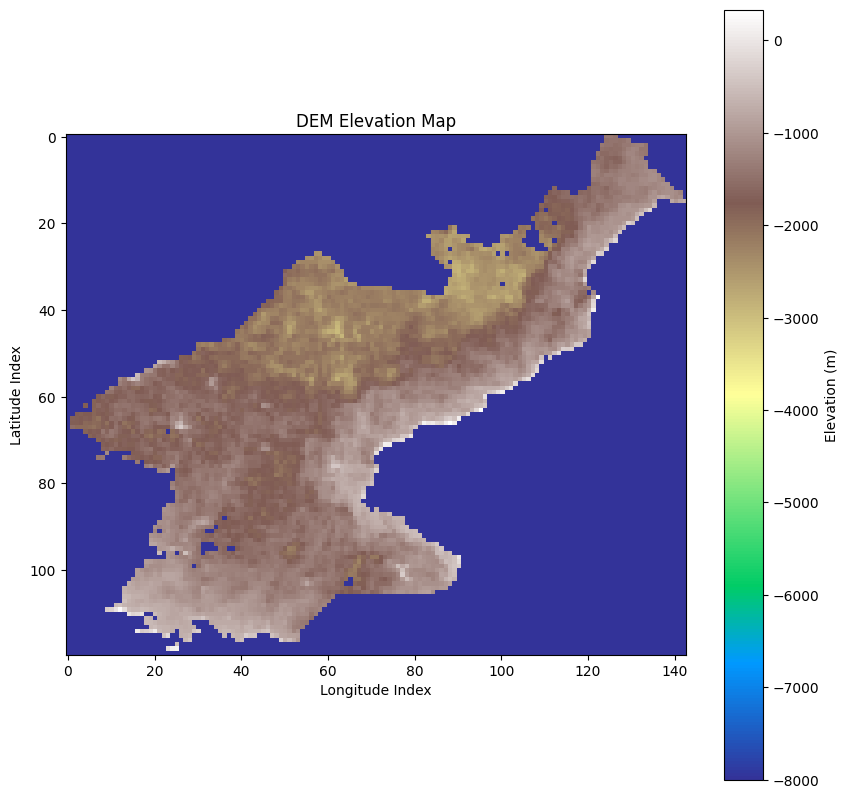

In [6]:
# 지형 고도 정보가 포함되있는 DEM 데이터
plt.figure(figsize=(10, 10))
plt.imshow(elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('DEM Elevation Map')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.show()

In [7]:
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt

# HDF 파일 열기
file_path = 'C:/Users/leeyj/Downloads/2023-05.hdf'
hdf = SD(file_path, SDC.READ)

# 데이터셋 목록 확인
datasets = hdf.datasets()
print(datasets)

# 특정 데이터셋 열기
dataset_name = '원하는 데이터셋 이름'
dataset = hdf.select(dataset_name)[:]

# 데이터 시각화
plt.imshow(dataset, cmap='viridis')
plt.colorbar()
plt.title(dataset_name)
plt.show()

ImportError: DLL load failed while importing _hdfext: 지정된 모듈을 찾을 수 없습니다.